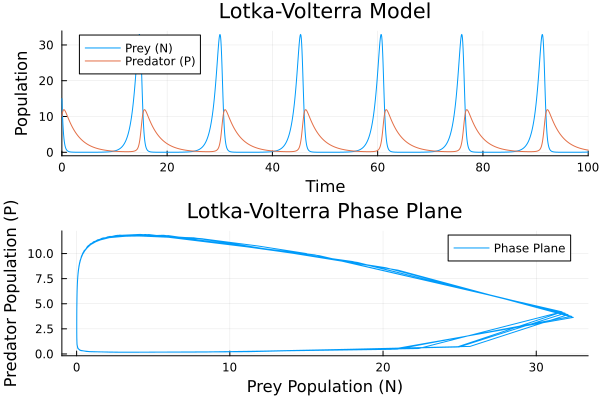

In [30]:
# Modeling: define variables & set up ODEs

using ModelingToolkit, OrdinaryDiffEq, Plots

@parameters α β γ r
@variables t P(t) N(t)
D = Differential(t)

eqs =  [D(N) ~ r*N - α*N*P,
        D(P) ~ β*N*P - γ*P
]
@named sys = ODESystem(eqs, t, [N, P], [α, β, γ, r])
sys_simplified = complete(sys)      # don't know why we need this but otherwise there's error 

# Simulation: assign initial conditions and parameter values, and solve
u0 = [N => 15.0,
      P => 10.0]

p = [α => 0.4, β => 0.1, γ => 0.4, r => 1.1]
tspan = (0.0, 100.0)

prob = ODEProblem(sys_simplified, u0, tspan, p)
sol = solve(prob, Tsit5())

# Visualization: plot & phase plane
t_plot = plot(sol, idxs=[N, P], xlabel="Time", ylabel="Population", label=["Prey (N)" "Predator (P)"], title="Lotka-Volterra Model")

N_vals = sol[N]
P_vals = sol[P]
phase_plane = plot(N_vals, P_vals, xlabel="Prey Population (N)", ylabel="Predator Population (P)", label="Phase Plane", title="Lotka-Volterra Phase Plane")

plot(t_plot, phase_plane, layout = (2, 1))

# Analysis
#=
The larger ALPHA is, the larger the difference of population sizes it is between prey and predators
The larger BETA is, the the faseter the predator population size increases
The larger GAMMA is, the faster the prey size increases
The larger R is, the slower the population size changes for both prey and predators
=#